In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
from scipy.special import binom

In [6]:
baselines_3gpp = pickle.load(open('results/ma_baselines.p', 'rb'))


In [7]:
x_list = baselines_3gpp['xp_params']['n_agents_list']


In [8]:
ippo_individual_obs_no_rnn = np.array([1, 0.9503686951756208, 0.7944816951435771, 0.6301831495489245, 0.5004494186584223])
ippo_individual_obs_with_rnn = np.array([1, 0.9800857510195862, 0.8729415977817488, 0.6673644440296255, 0.5076213343973243])
ippo_full_obs = np.array([1, 0.9987743404024766, 0.9950537341083809, 0.978842987639376, 0.9442514028855195])

In [11]:
d2d_ppo = np.array([1, 0.9889699384217046, 0.8947850333066774, 0.6927689281190259, 0.5583203514445847])

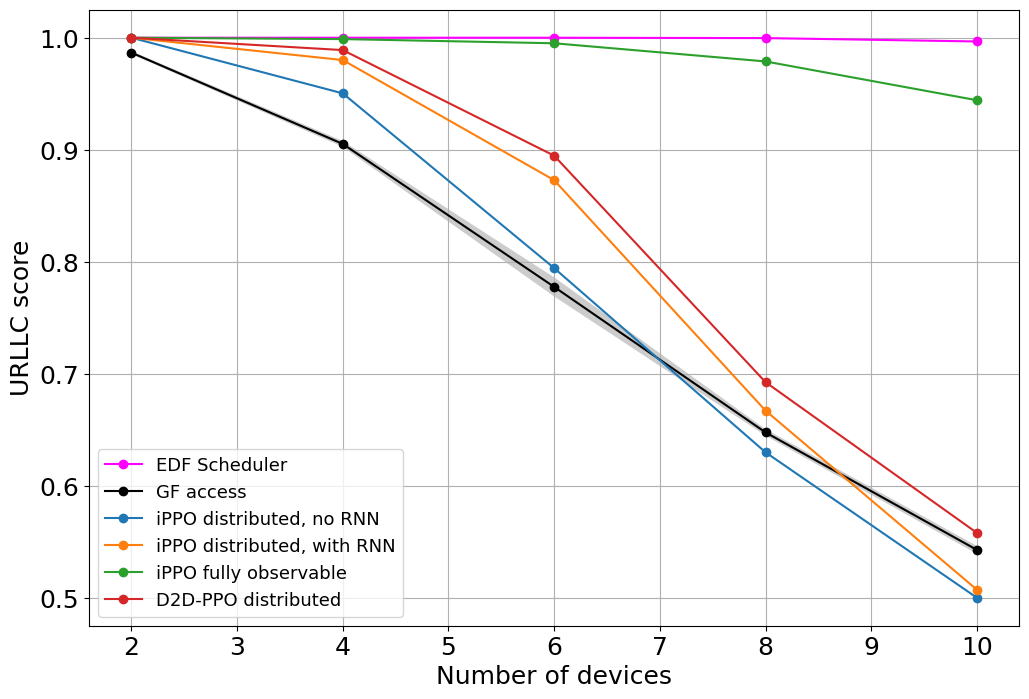

In [12]:
edf_scores = np.array(baselines_3gpp['edf_scores'])
gf_scores = np.array(baselines_3gpp['gf_scores'])


fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

ax.plot(x_list, edf_scores.mean(0), label='EDF Scheduler', marker='o', color='magenta')
ax.fill_between(x_list,
               edf_scores.mean(0) + edf_scores.std(0),
               edf_scores.mean(0) - edf_scores.std(0),
               facecolor='magenta',
               alpha=0.2)


ax.plot(x_list, gf_scores.mean(0), label='GF access', marker='o', color='black')
ax.fill_between(x_list,
               gf_scores.mean(0) + gf_scores.std(0),
               gf_scores.mean(0) - gf_scores.std(0),
               facecolor='black',
               alpha=0.2)

ax.plot(x_list, ippo_individual_obs_no_rnn, label='iPPO distributed, no RNN', marker='o')
ax.plot(x_list, ippo_individual_obs_with_rnn, label='iPPO distributed, with RNN', marker='o')
ax.plot(x_list, ippo_full_obs, label='iPPO fully observable', marker='o')
ax.plot(x_list, d2d_ppo, label='D2D-PPO distributed', marker='o')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)


plt.xlabel("Number of devices", fontsize=18)
plt.ylabel("URLLC score", fontsize=18)
plt.legend(fontsize=13)
plt.grid()

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42 
#plt.savefig('figures/aperiodic_collision_final.pdf', format='pdf')


In [18]:
gf_scores.mean(0)

array([0.98667081, 0.90524794, 0.77772834, 0.64793888, 0.54312687])

### Load xp

In [3]:
ippo = pickle.load(open('results/ippo_load_xp.p', 'rb'))
d2d_ppo = pickle.load(open('results/d2d_load_xp.p', 'rb'))
ra = pickle.load(open('results/random_access_load.p', 'rb'))

In [4]:
ippo['xp_params']

{'loads': [0.07142857142857142, 0.16666666666666666, 0.3333333333333333, 1],
 'deadlines': 7}

In [5]:
d2d_ppo['xp_params']

{'loads': [0.05,
  0.07142857142857142,
  0.16666666666666666,
  0.3333333333333333,
  1],
 'deadlines': 7}

In [6]:
loads = np.array([1/14, 1/7, 1/3, 1/1.5, 1])

In [11]:
scores_d2d = np.array([0.9996026467617835, 0.9982527866028966, 0.9887008794721063, 0.8863744510821789, 0.6804125935732592])
scores_ippo = np.array([0.9855978444287757, 0.9631704789869605, 0.8952596589166458, 0.769785943292363, 0.48388662410526606])

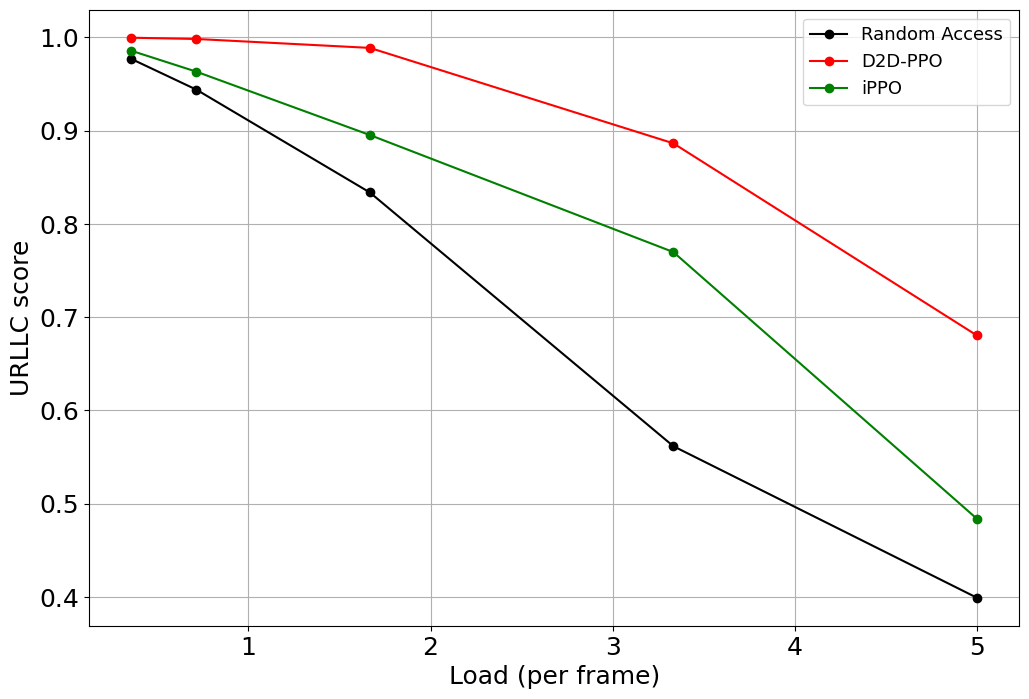

In [14]:
ra_scores = np.array(ra['scores'])
loads_per_frame = loads * 5

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

ax.plot(loads_per_frame, ra_scores.mean(0), label='Random Access', marker='o', color='black')

ax.plot(loads_per_frame, scores_d2d, label='D2D-PPO', marker='o', color='red')
ax.plot(loads_per_frame, scores_ippo, label='iPPO', marker='o', color="green")

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)


plt.xlabel("Load (per frame)", fontsize=18)
plt.ylabel("URLLC score", fontsize=18)
plt.legend(fontsize=13)
plt.grid()

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42 
#plt.savefig('figures/aperiodic_collision_final.pdf', format='pdf')


In [22]:
gammas = [0.2, 0.4, 0.6, 0.8, 0.99]
d2d_gamma = np.array([0.9924636304409773, 0.9930599621616852, 0.9932859501974617, 0.992146474890764, 0.9929057751876793])
ippo_gamma = np.array([0.9932904443692856, 0.9937197913152174, 0.9926626085285397, 0.9239552676298637])

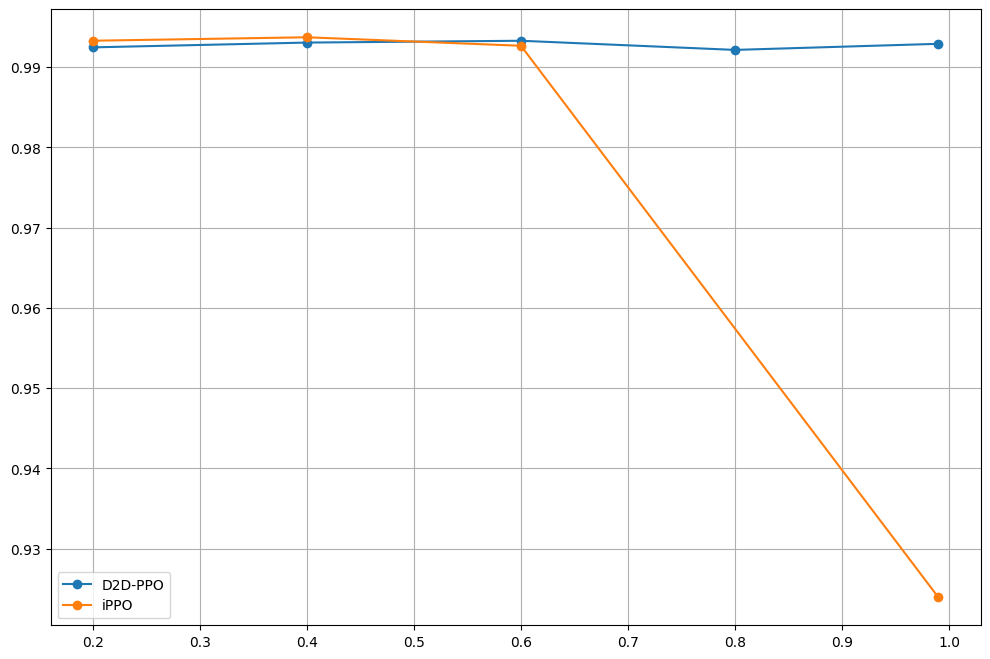

In [24]:
plt.figure(figsize=(12,8))
plt.plot(gammas, d2d_gamma, marker='o', label='D2D-PPO')
plt.plot([0.2, 0.4, 0.6, 0.99], ippo_gamma, marker='o', label='iPPO')
plt.legend()
plt.grid()
plt.show()